In [1]:
# Reference https://www.youtube.com/watch?v=gCWBFyFTxVU
# Dataset https://www.kaggle.com/mlg-ulb/creditcardfraud

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot

import numpy as np
import seaborn as sns

# ml models decistion tree
from sklearn.tree import DecisionTreeClassifier

# One of the Ensemle model -- Random Forset which is ensemple of decision trees
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier

# import logistic regression, SVC  for ensembling
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC

# Naive Bayes
from sklearn.naive_bayes import MultinomialNB

# Distance based
from sklearn.neighbors import KNeighborsClassifier

# packages for metric for evalaution of the models
from sklearn import metrics
from sklearn.metrics import classification_report , accuracy_score, confusion_matrix

# to save the models so that we don't need to train the models every time we need to do prediction
from sklearn.externals import joblib

# Rule based classifier
from sklearn.dummy import DummyClassifier

# let's do some moedelling
from sklearn.model_selection import train_test_split, cross_val_score



In [2]:
df_numeric = pd.read_csv(r'C:\Users\Adarsh\uOttawa\ML Course Project-7Apr\datasets\2_numeric_data.csv')
df_text = pd.read_csv(r'C:\Users\Adarsh\uOttawa\ML Course Project-7Apr\datasets\4a-after-text-cleaning.csv')

In [3]:
df_numeric.columns

Index(['overall-ratings', 'work-balance-stars', 'culture-values-stars',
       'carrer-opportunities-stars', 'comp-benefit-stars',
       'senior-mangemnet-stars', 'helpful-count', 'job_status', 'post_day',
       'post_month', 'post_year', 'company_amazon', 'company_apple',
       'company_facebook', 'company_google', 'company_microsoft',
       'company_netflix', 'job_title_num', 'location_num'],
      dtype='object')

In [4]:
df_text.columns

Index(['feedback', 'job_status', 'feedback_word_count', 'avg_word_len',
       'sentiment_score', 'sentiment', 'feedback1'],
      dtype='object')

In [5]:
df_text.sentiment_score.value_counts()

 0.000000    720
 0.500000    534
 0.700000    396
 0.400000    369
 0.800000    346
 0.600000    311
 0.300000    264
 0.250000    241
 0.200000    235
 0.350000    214
 0.450000    203
 0.750000    164
 0.375000    163
 1.000000    161
 0.533333    142
 0.650000    141
 0.425000    137
 0.333333    132
 0.266667    126
 0.433333    121
 0.325000    118
 0.166667    109
 0.550000    109
 0.100000    107
 0.233333    107
 0.275000    103
 0.466667    101
 0.366667     99
 0.625000     98
 0.475000     95
            ... 
 0.336335      1
 0.258438      1
 0.085714      1
 0.275847      1
 0.392041      1
 0.052219      1
 0.219940      1
 0.322841      1
 0.198452      1
 0.252967      1
 0.111565      1
 0.216698      1
 0.280128      1
 0.441151      1
 0.137290      1
 0.273631      1
 0.483704      1
 0.156544      1
 0.460938      1
 0.484375      1
 0.126904      1
 0.301905      1
 0.236333      1
 0.276042      1
 0.079305      1
 0.356205      1
 0.085283      1
 0.283607     

In [6]:
# stack the DataFrames on top of each other/ Merge datasets row -wise 
df1 = df_numeric
df2 = df_text[[ 'feedback_word_count', 'avg_word_len', 'sentiment_score' ]]

# concat column wise so axis would 1
df = pd.concat([df1, df2], axis=1)
df.shape

(40000, 22)

In [7]:
df.head(5)

,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,job_status,post_day,post_month,...,company_apple,company_facebook,company_google,company_microsoft,company_netflix,job_title_num,location_num,feedback_word_count,avg_word_len,sentiment_score
0,4.0,4.0,2.5,4.0,4.5,4.0,0,0,20,3,...,0,0,0,0,0,0.00040,0.068375,88,4.534091,0.124329
1,5.0,5.0,5.0,5.0,5.0,5.0,0,0,31,10,...,1,0,0,0,0,0.00005,0.018650,104,4.336538,0.448133
2,5.0,3.0,5.0,5.0,5.0,5.0,1,0,16,4,...,0,0,0,0,0,0.41015,0.377600,151,4.516556,0.373810
3,3.0,2.0,2.0,3.0,4.0,2.0,2,0,3,1,...,0,0,0,0,0,0.00050,0.068375,153,4.895425,0.199087
4,5.0,5.0,5.0,5.0,5.0,5.0,0,0,27,12,...,0,0,0,0,0,0.41015,0.377600,27,6.370370,0.480000


In [8]:
# save data for any future processing
df.to_csv(r'C:\Users\Adarsh\uOttawa\ML Course Project-7Apr\datasets\6a-combined-text-numeric.csv', 
                    index=False)

In [9]:
# check for class imbalance problem
df.job_status.value_counts()


1    20000
0    20000
Name: job_status, dtype: int64

In [10]:
df.columns.value_counts().sum()

22

In [11]:
# prepare for training
X = df[['overall-ratings', 'work-balance-stars', 'culture-values-stars',
       'carrer-opportunities-stars', 'comp-benefit-stars',
       'senior-mangemnet-stars', 'helpful-count', 'post_day',
       'post_month', 'post_year', 'company_amazon', 'company_apple',
       'company_facebook', 'company_google', 'company_microsoft',
       'company_netflix', 'job_title_num', 'location_num',
       'feedback_word_count', 'avg_word_len', 'sentiment_score']]

Y = df['job_status']


In [12]:
X.head(2)

,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,post_day,post_month,post_year,...,company_apple,company_facebook,company_google,company_microsoft,company_netflix,job_title_num,location_num,feedback_word_count,avg_word_len,sentiment_score
0,4.0,4.0,2.5,4.0,4.5,4.0,0,20,3,2010,...,0,0,0,0,0,0.00040,0.068375,88,4.534091,0.124329
1,5.0,5.0,5.0,5.0,5.0,5.0,0,31,10,2014,...,1,0,0,0,0,0.00005,0.018650,104,4.336538,0.448133


In [13]:
# As X has negtaive values and Multinomial NB doesnt work with negative values we need to scale the data to 0 to 1
from sklearn.preprocessing import MinMaxScaler
data = X
scaler = MinMaxScaler()
scaler.fit(data)
MinMaxScaler(copy=True, feature_range=(0, 1))

scaler.transform(data)

# Assign the data to X (our input variables)
X = data


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [14]:
%%time

# all required types of models
models = [
    # a. Linear classifier
    LogisticRegression(),
    LinearSVC(),
    
    # b. Tree-based models
    DecisionTreeClassifier(),
    
    # c. Distance-based models 
    KNeighborsClassifier(n_neighbors=5),
    
    # d. Rule-based
    DummyClassifier(),
    
    # e. Probabilistic model
    #MultinomialNB()
    
]

# define 10 cross validation
CV = 10
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []

for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, X, Y, scoring='accuracy', cv=CV)
    
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))

cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
print(cv_df.groupby('model_name').accuracy.mean())


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

model_name
DecisionTreeClassifier    0.736300
DummyClassifier           0.501925
KNeighborsClassifier      0.614900
LinearSVC                 0.500475
LogisticRegression        0.592725
Name: accuracy, dtype: float64
Wall time: 1min 6s


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2 , random_state = 4)

In [16]:
%%time
# let's try how ensemling ( Random forest wit 10 decision trees ) performs 
random_forest = RandomForestClassifier(n_estimators=10)
random_forest.fit(X_train, y_train)


filepath = r'C:\Users\Adarsh\uOttawa\ML Course Project-7Apr\saved_models\combined-data\random_forest_model'
joblib.dump(random_forest ,filepath )
# load model for prediction
#random_forest = joblib.load(filepath)

print("Accuracy = ")
print(random_forest.score(X_test, y_test))
print("\n")
y_pred_rf = random_forest.predict(X_test)
print(classification_report(y_test, y_pred_rf))

Accuracy = 
0.73375


              precision    recall  f1-score   support

           0       0.72      0.78      0.75      4010
           1       0.76      0.69      0.72      3990

   micro avg       0.73      0.73      0.73      8000
   macro avg       0.74      0.73      0.73      8000
weighted avg       0.74      0.73      0.73      8000

Wall time: 454 ms


AUC = 0.7398714991968699


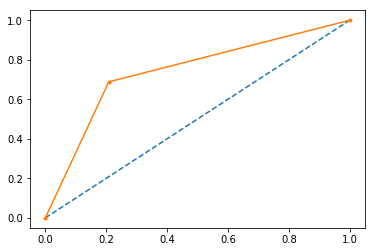

In [119]:
# calculaye fpr, tpr
fpr_rf, tpr_rf, thresholds_rf = metrics.roc_curve(y_test,  y_pred_rf)
# calculate Area Under the curve
auc_rf = metrics.roc_auc_score(y_test, y_pred_rf)

print("AUC = " + str(auc_rf))

# plot
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr_rf, tpr_rf, marker='.')
# show the plot
pyplot.show()

In [120]:
%%time
# Random Forest is performing better than Decision tree.Ensemling improved precision and F1-score.
# let's try bagging classifier
# We will give 20 Decisions Trees, each with 50% of training dataset and 100% features
bg = BaggingClassifier( DecisionTreeClassifier() , max_samples = 0.5 , max_features= 1.0 , n_estimators=20 )
bg.fit(X_train , y_train)

Wall time: 4.51 s


In [121]:
# save the baggign classifier model
filepath = r'C:\Users\Adarsh\uOttawa\ML Course Project-7Apr\saved_models\combined-data\BaggingClassifier_model'
joblib.dump(bg ,filepath )
# load model for prediction
bg = joblib.load(filepath)

In [122]:
%%time
print("Accuracy = ")
print(bg.score(X_test, y_test))
print("\n")

y_pred_bg = bg.predict(X_test)
print(classification_report(y_test, y_pred_bg))

Accuracy = 
0.721125


              precision    recall  f1-score   support

           0       0.72      0.73      0.72      4010
           1       0.72      0.71      0.72      3990

   micro avg       0.72      0.72      0.72      8000
   macro avg       0.72      0.72      0.72      8000
weighted avg       0.72      0.72      0.72      8000

Wall time: 239 ms


AUC = 0.7211054444090276


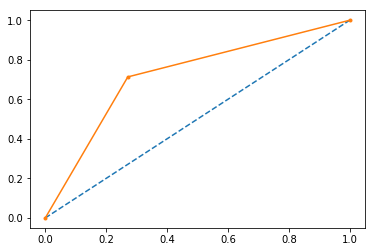

In [123]:
# calculaye fpr, tpr
fpr_bg, tpr_bg, thresholds_bg = metrics.roc_curve(y_test,  y_pred_bg)
# calculate Area Under the curve
auc_bg = metrics.roc_auc_score(y_test, y_pred_bg)

print("AUC = " + str(auc_bg))

# plot
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr_bg, tpr_bg, marker='.')
# show the plot
pyplot.show()

In [124]:
%%time
# let's see the performance of BoostingClassifier -ADABoost
# 10 decision trees , learning rate will shrink the contribution of each individual learner 
adaboost = AdaBoostClassifier( DecisionTreeClassifier() , n_estimators= 10 , learning_rate= 1 )
adaboost.fit(X_train, y_train)

Wall time: 581 ms


In [125]:
# save the adaboost classifier model
filepath = r'C:\Users\Adarsh\uOttawa\ML Course Project-7Apr\saved_models\combined-data\adaboost_model'
joblib.dump(adaboost ,filepath )
# load model for prediction
adaboost = joblib.load(filepath)

In [126]:
%%time
print("Accuracy = ")
print(adaboost.score(X_test , y_test))

print("\n")

y_pred_adaboost = adaboost.predict(X_test)
print(classification_report(y_test , y_pred_adaboost))

Accuracy = 
0.714125


              precision    recall  f1-score   support

           0       0.73      0.69      0.71      4010
           1       0.70      0.74      0.72      3990

   micro avg       0.71      0.71      0.71      8000
   macro avg       0.71      0.71      0.71      8000
weighted avg       0.71      0.71      0.71      8000

Wall time: 38.6 ms


AUC = 0.714180401127507


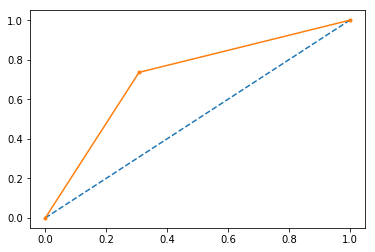

In [127]:
# calculaye fpr, tpr
fpr_adaboost, tpr_adaboost, thresholds_adaboost = metrics.roc_curve(y_test,  y_pred_adaboost)
# calculate Area Under the curve
auc_adaboost = metrics.roc_auc_score(y_test, y_pred_adaboost)

print("AUC = " + str(auc_adaboost))

# plot
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr_adaboost, tpr_adaboost, marker='.')
# show the plot
pyplot.show()

In [128]:
%%time
# Experiement with different types of ensembling
models = [
    # a. Random Forest
    RandomForestClassifier(n_estimators=10),
    
    # b. Bagging
    BaggingClassifier(DecisionTreeClassifier() , max_samples = 0.5 , max_features= 1.0 , n_estimators=20 ),
    
    # c. Boosting
    AdaBoostClassifier( DecisionTreeClassifier() , n_estimators= 10 , learning_rate= 1 ),
    
    # Custom Voting Classifier
    VotingClassifier( estimators=[('adaboost', adaboost), ('random_forest', random_forest), ('bg', bg)] , voting='hard' )

    
]

# define 10 cross validation
CV = 10
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []

for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, X, Y, scoring='accuracy', cv=CV)
    
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))

cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
cv_df.groupby('model_name').accuracy.mean()


Wall time: 2min 20s


In [129]:
%%time
# let's have our own ensembles method
# a combination of decesion tree, SVM, Logistic Regression
#lr = LogisticRegression()
#dt = DecisionTreeClassifier()
# svm will have ploynomial of degree two
#svm = SVC(kernel='poly' , degree= 2)

# votoing hard means votes on the labels not on the probabilities
ensemble_vc = VotingClassifier( estimators=[ ('adaboost', adaboost) , 
                                            ('random_forest', random_forest) , 
                                            ('bg', bg)] , voting='hard' )


ensemble_vc.fit(X_train , y_train)

# save the custom ensembling classifier model 
filepath = r'C:\Users\Adarsh\uOttawa\ML Course Project-7Apr\saved_models\combined-data\ensemble_voting_classifier_model'
joblib.dump(ensemble_vc ,filepath )
# load model for prediction
ensemble_vc = joblib.load(filepath)

print("Accuracy = ")
print(ensemble_vc.score(X_test, y_test))
print("\n")

# print the metrices for our ensemmbled model
y_pred_ensemble_vc = ensemble_vc.predict(X_test)
print( classification_report(y_test , y_pred_ensemble_vc) )

Accuracy = 
0.73725


              precision    recall  f1-score   support

           0       0.73      0.76      0.74      4010
           1       0.75      0.71      0.73      3990

   micro avg       0.74      0.74      0.74      8000
   macro avg       0.74      0.74      0.74      8000
weighted avg       0.74      0.74      0.74      8000

Wall time: 6.78 s


AUC = 0.7371858574116089


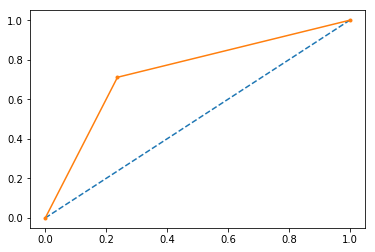

In [130]:
# calculaye fpr, tpr
fpr_vc, tpr_vc, thresholds_vc = metrics.roc_curve(y_test,  y_pred_ensemble_vc)
# calculate Area Under the curve
auc_vc = metrics.roc_auc_score(y_test, y_pred_ensemble_vc)

print("AUC = " + str(auc_vc))

# plot
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr_vc, tpr_vc, marker='.')
# show the plot
pyplot.show()

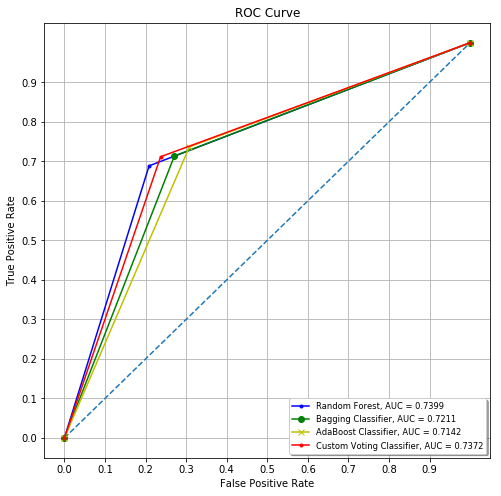

In [131]:
# Create plots with pre-defined labels.
fig, ax = plt.subplots(figsize=(8,8))

plt.xticks(np.arange(0, 1, 0.1))
plt.yticks(np.arange(0, 1, 0.1))


pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model

# Random Forest
ax.plot(fpr_rf, tpr_rf, marker='.', color = 'b',  label='Random Forest, AUC = '+str(round(auc_rf,4)))
# Bagging Classifier
ax.plot(fpr_bg, tpr_bg, marker='o', color = 'g',  label='Bagging Classifier, AUC = '+str(round(auc_bg,4)))
# AdaBoost Classifier
ax.plot(fpr_adaboost, tpr_adaboost, marker='x', color = 'y',  label='AdaBoost Classifier, AUC = '+str(round(auc_adaboost,4)))
# Custom Voting Classifier
ax.plot(fpr_vc, tpr_vc, marker='.',  color = 'r',  label='Custom Voting Classifier, AUC = '+str(round(auc_vc,4)))

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')



plt.title('ROC Curve')
plt.grid(True)

legend = ax.legend(loc='lower right', shadow=True, fontsize='small')


In [132]:
# Save the 10 Fold accuracies of the meta-models for statistica testing
filepath = r'C:\Users\Adarsh\uOttawa\ML Course Project-7Apr\intermediate_data\10-fold-accuracies-meta-models'
joblib.dump(cv_df ,filepath )

print(cv_df)



                model_name  fold_idx  accuracy
0   RandomForestClassifier         0   0.74950
1   RandomForestClassifier         1   0.75150
2   RandomForestClassifier         2   0.75975
3   RandomForestClassifier         3   0.75925
4   RandomForestClassifier         4   0.76250
5   RandomForestClassifier         5   0.75675
6   RandomForestClassifier         6   0.74600
7   RandomForestClassifier         7   0.75675
8   RandomForestClassifier         8   0.74900
9   RandomForestClassifier         9   0.75950
10       BaggingClassifier         0   0.74500
11       BaggingClassifier         1   0.75075
12       BaggingClassifier         2   0.74500
13       BaggingClassifier         3   0.74575
14       BaggingClassifier         4   0.74125
15       BaggingClassifier         5   0.74975
16       BaggingClassifier         6   0.75000
17       BaggingClassifier         7   0.74750
18       BaggingClassifier         8   0.74200
19       BaggingClassifier         9   0.74425
20      AdaBo